In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt
from library.sb_utils import save_file

In [2]:
data = pd.read_csv('../data/HR-Employee-Attrition.csv')

#### Preview the data and info

In [3]:
data.shape

(1470, 35)

In [4]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Check for missing values

In [6]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Age,0,0.0
StandardHours,0,0.0
NumCompaniesWorked,0,0.0
Over18,0,0.0
OverTime,0,0.0
PercentSalaryHike,0,0.0
PerformanceRating,0,0.0
RelationshipSatisfaction,0,0.0
StockOptionLevel,0,0.0
MonthlyIncome,0,0.0


There aren't any null values, so this is a good start.

#### Check for unique entries

In [7]:
data.drop_duplicates().head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [8]:
data.shape

(1470, 35)

The shape of the data is the same as before, so all the records are unique.

Time to set the index. 

In [9]:
data = data.set_index('EmployeeNumber')
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


#### Check out the numeric features

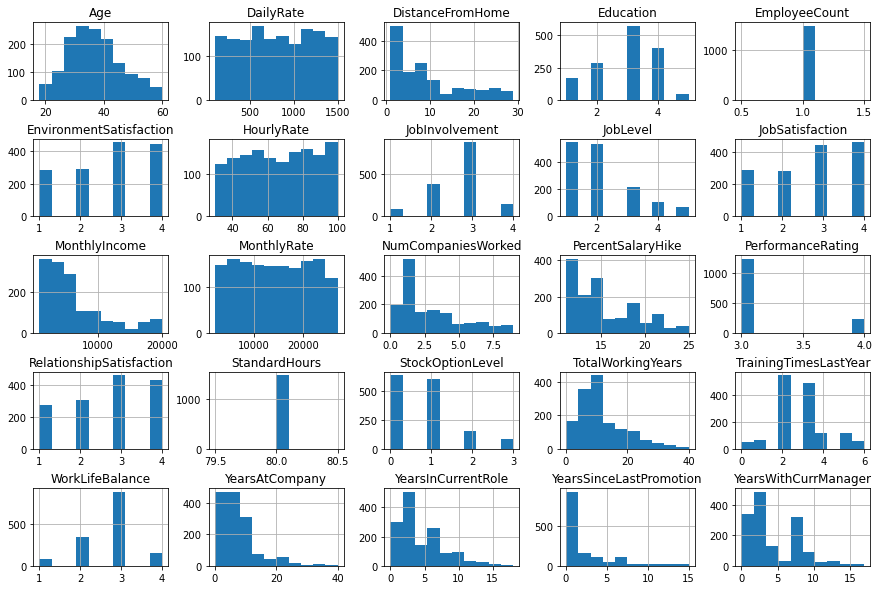

In [10]:
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

Looks like `StandardHours` and `EmployeeCount` are both just single values. We can just drop those. I'm wondering if I should map the `PerformanceRating` to a binary scheme since there are just two values, but I'll leave it for now. All the other feature distributions don't raise any eyebrows.

In [11]:
data = data.drop(['StandardHours', 'EmployeeCount'], axis=1)

In [12]:
data.shape

(1470, 32)

#### Check out the categorical features

In [13]:
data.select_dtypes(object).head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
EmployeeNumber,,,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
2,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
4,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes


Lets take a look at how many different busineess travel, education fields, job role and departments there are. 

In [14]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [15]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [16]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [17]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Depeding on the type of model used, it may be useful to encode the data from the categorical features.

#### Encode the categorical features

In [18]:
# initialize data frame
numerical_data = data

In [19]:
le = LabelEncoder()

In [20]:
le.fit(data['Attrition'])
num_attrition = le.transform(data['Attrition']) 

le.fit(data['BusinessTravel'])
num_travel = le.transform(data['BusinessTravel'])

le.fit(data['Department'])
num_department = le.transform(data['Department'])

le.fit(data['EducationField'])
num_education = le.transform(data['EducationField'])

le.fit(data['Gender'])
num_gender = le.transform(data['Gender'])

le.fit(data['JobRole'])
num_job = le.transform(data['JobRole'])

le.fit(data['MaritalStatus'])
num_marital = le.transform(data['MaritalStatus'])

le.fit(data['Over18'])
num_over18 = le.transform(data['Over18'])

le.fit(data['OverTime'])
num_overtime = le.transform(data['OverTime'])

In [21]:
print(set(num_attrition), set(num_travel), 
      set(num_department), set(num_education), 
      set(num_gender), set(num_job), 
      set(num_marital), set(num_over18), set(num_overtime))

{0, 1} {0, 1, 2} {0, 1, 2} {0, 1, 2, 3, 4, 5} {0, 1} {0, 1, 2, 3, 4, 5, 6, 7, 8} {0, 1, 2} {0} {0, 1}


It looks like there is only one value for the over 18... a bar graph might be useful here to double check this.

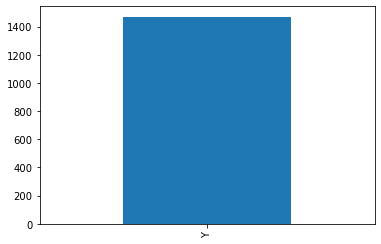

In [22]:
data.Over18.value_counts().plot(kind='bar')
plt.show()

Seems like everyone is over 18, it is best to drop it.

In [23]:
data = data.drop('Over18', axis=1)

In [24]:
data.select_dtypes(object).head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
2,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
4,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


Time to save the encoded data

In [25]:
encoded_data = pd.DataFrame()
encoded_data  = pd.concat([encoded_data, data.select_dtypes(int)], axis=1)

In [26]:
encoded_data['Attrition'] = num_attrition
encoded_data['BusinessTravel'] = num_travel
encoded_data['Department'] = num_travel
encoded_data['EducationField'] = num_education
encoded_data['Gender'] = num_gender
encoded_data['JobRole'] = num_job
encoded_data['MaritalStatus'] = num_marital
encoded_data['OverTime'] = num_overtime

In [27]:
encoded_data.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Attrition                   int64
BusinessTravel              int64
Department                  int64
EducationField              int64
Gender                      int64
JobRole                     int64
MaritalStatus 

Everything has now been encoded. Time to check the distributions again.

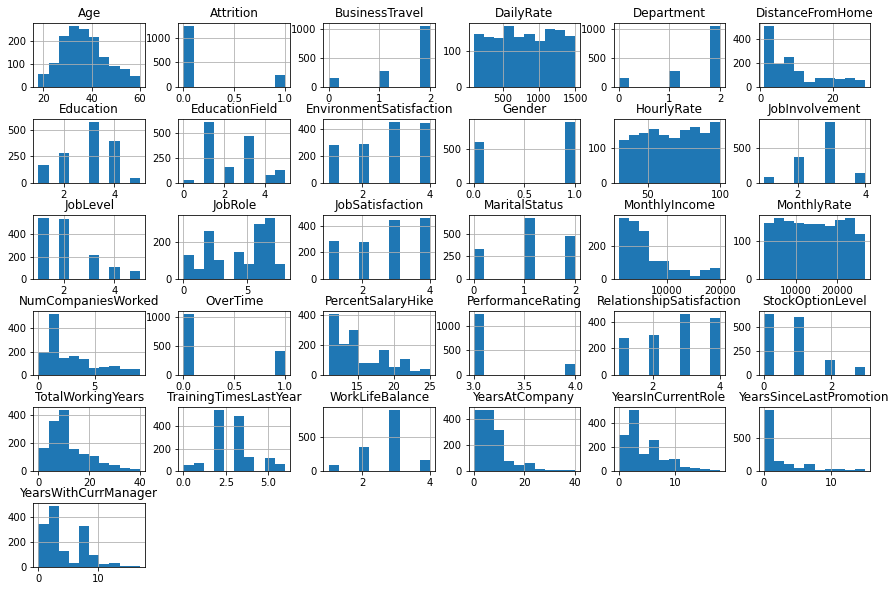

In [28]:
encoded_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Save data

In [29]:
# save the data to a new csv file
datapath = '../data'
save_file(data, 'clean_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/clean_data.csv"


In [30]:
# save the encoded_data separately.
datapath = '../data'
save_file(encoded_data, 'encoded_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/encoded_data.csv"
